In [1]:
# give me code to identify and predict Iris data using decision treee
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
# Load the Iris dataset
iris = load_iris()
# Create a DataFrame from the dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print("Iris Dataset:")
print(df.head())

Iris Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [3]:
# Add the target variable to the DataFrame
df['target'] = iris.target
print("\nIris Dataset with Target:")
print(df.head())


Iris Dataset with Target:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [4]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [5]:
#understand the labels of the target variable
target_labels = iris.target_names
print("\nTarget Labels:")
for i, label in enumerate(target_labels):
    print(f"{i}: {label}")
# Split the dataset into features and target variable


Target Labels:
0: setosa
1: versicolor
2: virginica


In [6]:
# split the data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# make a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
# Train the classifier on the training data
clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_test)
# Evaluate the classifier's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of Decision Tree Classifier: {accuracy:.2f}")
# Display the predictions
print("\nPredictions on Test Set:")
for i, pred in enumerate(y_pred):
    print(f"Sample {i}: Predicted class = {target_labels[pred]}, Actual class = {target_labels[y_test.iloc[i]]}")


Accuracy of Decision Tree Classifier: 1.00

Predictions on Test Set:
Sample 0: Predicted class = versicolor, Actual class = versicolor
Sample 1: Predicted class = setosa, Actual class = setosa
Sample 2: Predicted class = virginica, Actual class = virginica
Sample 3: Predicted class = versicolor, Actual class = versicolor
Sample 4: Predicted class = versicolor, Actual class = versicolor
Sample 5: Predicted class = setosa, Actual class = setosa
Sample 6: Predicted class = versicolor, Actual class = versicolor
Sample 7: Predicted class = virginica, Actual class = virginica
Sample 8: Predicted class = versicolor, Actual class = versicolor
Sample 9: Predicted class = versicolor, Actual class = versicolor
Sample 10: Predicted class = virginica, Actual class = virginica
Sample 11: Predicted class = setosa, Actual class = setosa
Sample 12: Predicted class = setosa, Actual class = setosa
Sample 13: Predicted class = setosa, Actual class = setosa
Sample 14: Predicted class = setosa, Actual clas

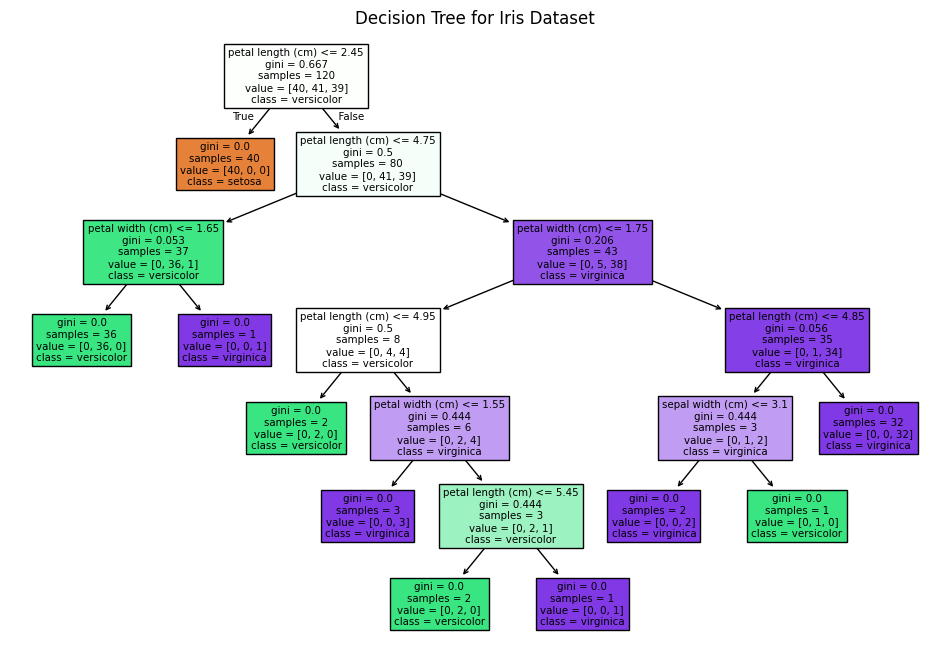

In [10]:
# plot the decision tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree for Iris Dataset")
plt.show()

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


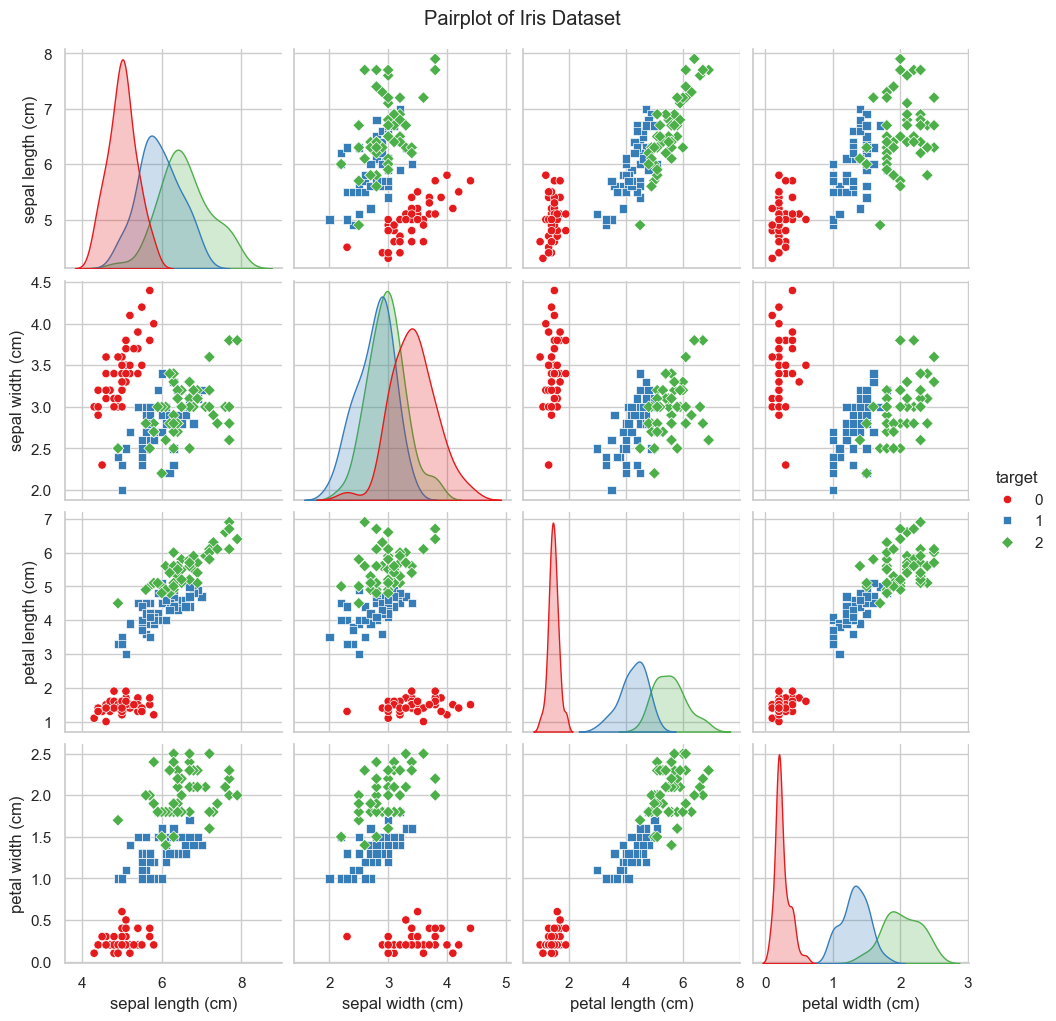

In [ ]:
# plot a cluster plot of the data
import seaborn as sns
sns.set(style="whitegrid")
sns.pairplot(df, hue='target', palette='Set1', markers=["o", "s", "D"], diag_kind='kde')
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

In [12]:
# save the model to a file
import joblib
# Save the trained model to a file
joblib.dump(clf, 'iris_decision_tree_model.pkl')
# Load the model from the file
loaded_clf = joblib.load('iris_decision_tree_model.pkl')
# Verify that the loaded model works
loaded_y_pred = loaded_clf.predict(X_test)
# Check if the predictions from the loaded model match the original predictions
assert (y_pred == loaded_y_pred).all(), "Loaded model predictions do not match original predictions."
print("\nModel saved and loaded successfully. Predictions match.")


Model saved and loaded successfully. Predictions match.
